## Objective
### Understand the Dataset
### Build classification models to predict the wine quality.
### Fine-tune the hyperparameters & compare the evaluation metrics of various classification algorithms.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline
sns.set_style('whitegrid')

import scipy
import warnings

warnings.filterwarnings('ignore')

In [43]:
data_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML241EN-SkillsNetwork/labs/datasets/Wine_Quality_Data.csv"
data = pd.read_csv(data_url, sep=',')

In [44]:
data.head(10)

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   
6            7.9              0.60         0.06             1.6      0.069   
7            7.3              0.65         0.00             1.2      0.065   
8            7.8              0.58         0.02             2.0      0.073   
9            7.5              0.50         0.36             6.1      0.071   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   
5                 13.0                  40.0   0.9978  3.51       0.56   
6                 15.0                  59.0   0.9964  3.30       0.46   
7                 15.0                  21.0   0.9946  3.39       0.47   
8                  9.0                  18.0   0.9968  3.36       0.57   
9                 17.0                 102.0   0.9978  3.35       0.80   

   alcohol  quality color  
0      9.4        5   red  
1      9.8        5   red  
2      9.8        5   red  
3      9.8        6   red  
4      9.4        5   red  
5      9.4        5   red  
6      9.4        5   red  
7     10.0        7   red  
8      9.5        7   red  
9     10.5        5   red

In [45]:
print("Data types: \n{}".format(data.dtypes))

Data types: 
fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
color                    object
dtype: object


In [46]:
print(f'Checking null values of the given dataset: \n{data.isnull().sum()}')

Checking null values of the given dataset: 
fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
color                   0
dtype: int64


In [47]:
print(f'The description of the given data: ')
print()
print({data.info()})

The description of the given data: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB
{None}


In [48]:
data['color'] = data.color.replace('white',0).replace('red',1).astype(int)

In [49]:
data.corr().style.background_gradient(cmap = 'Greens')

In [50]:
data.describe().T.style.background_gradient(cmap = 'Greens')

In [51]:
print('Checking any duplicated values in given dataframe: {}'.format(data.duplicated().sum()))

Checking any duplicated values in given dataframe: 1177


In [52]:
data.duplicated()

0       False
1       False
2       False
3       False
4        True
        ...  
6492    False
6493    False
6494    False
6495    False
6496    False
Length: 6497, dtype: bool

In [53]:
data = data.drop_duplicates()

In [54]:
print('Checking any duplicated values in given dataframe: {}'.format(data.duplicated().sum()))

Checking any duplicated values in given dataframe: 0


## Exploratory Data Analysis
### Univariate Analysis

In [55]:
data.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'color'],
      dtype='object')

In [56]:
def feat_plot(feature):
    plt.figure(figsize=(16, 6))
    plt.subplot(1, 3, 1)
    feature.plot(kind = 'hist')
    plt.title(f'{feature.name} histogram plot')
    
    #mean = feature.describe().mean()
    plt.subplot(1, 3, 2)
    mu, sigma = scipy.stats.norm.fit(feature)
    sns.distplot(feature) 
    #plt.legend({'--': mu, 'sigma': sigma})
    plt.axvline(mu, linestyle = '--', color = 'green', )
    plt.axvline(sigma, linestyle = '--', color = 'red')
    plt.title(f'{feature.name} distribution plot')
    
    plt.subplot(1, 3, 3)
    sns.boxplot(feature)
    plt.title(f'{feature.name} box plot')
    plt.show()

In [57]:
num_feat = data.select_dtypes(exclude = 'object')

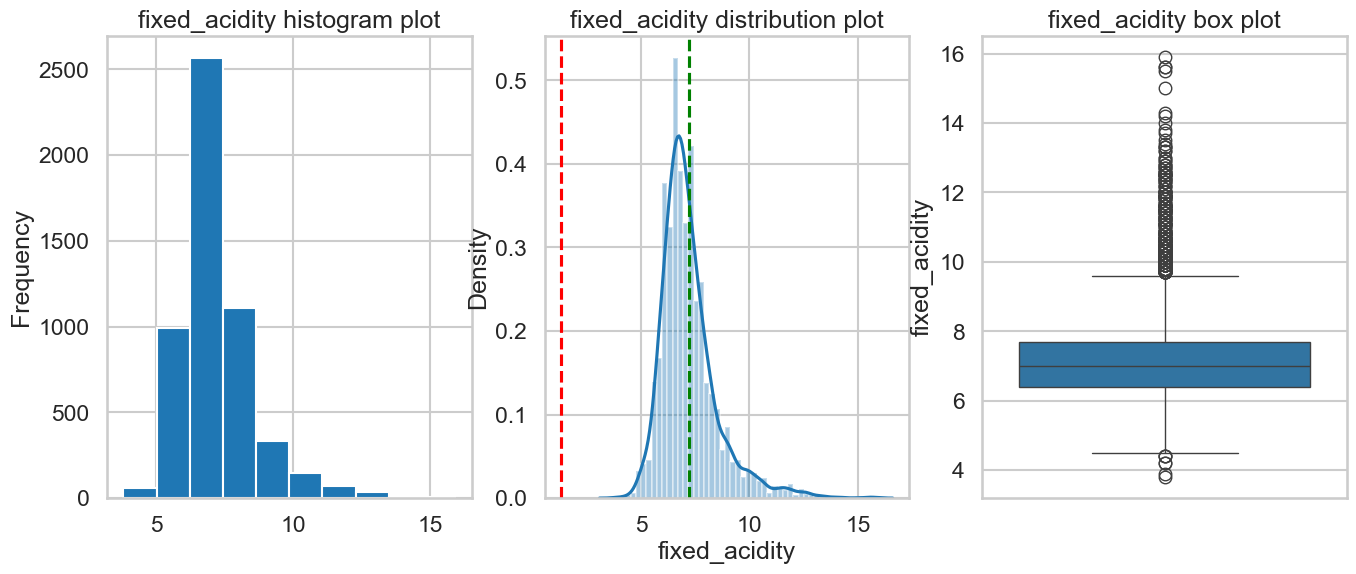

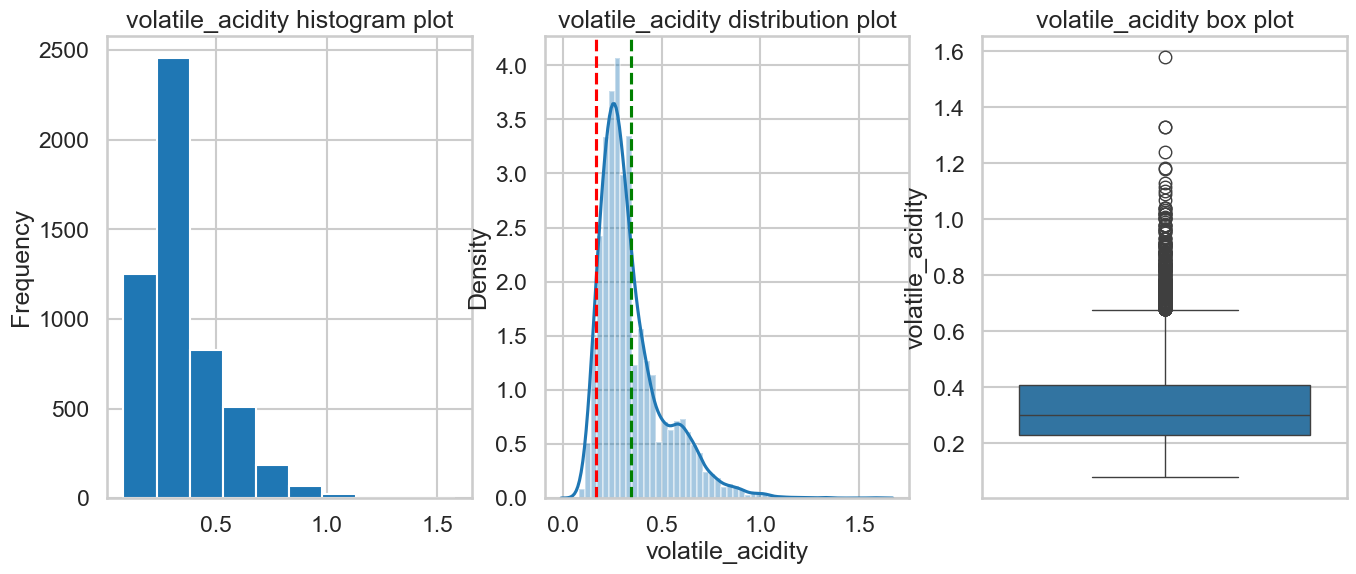

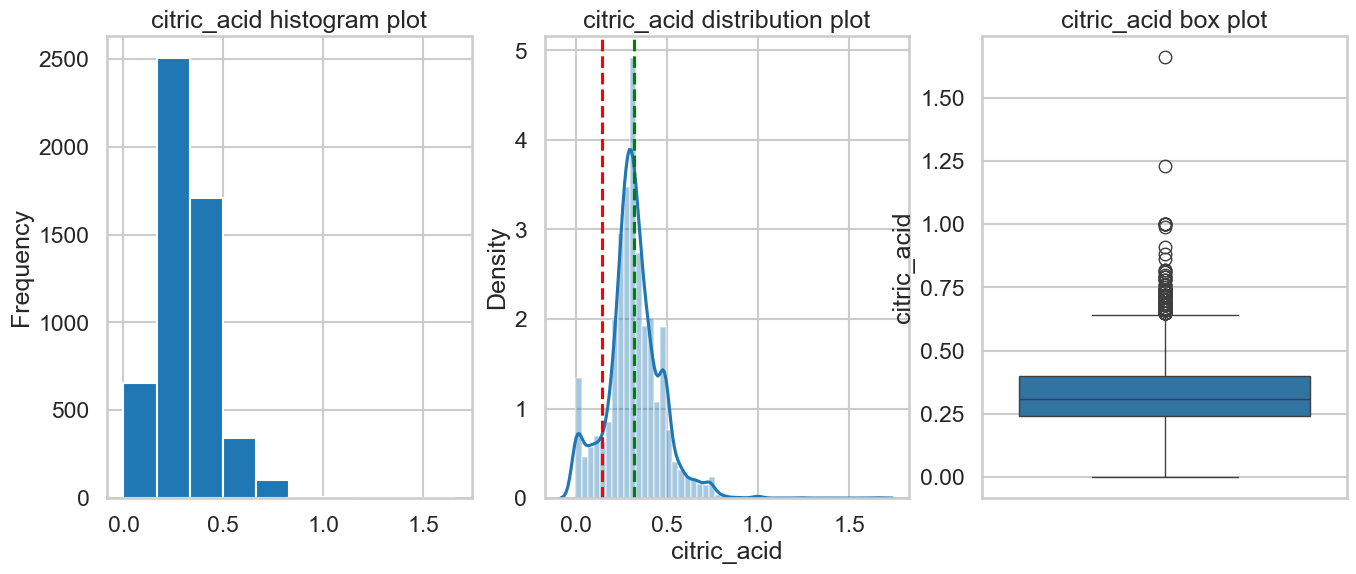

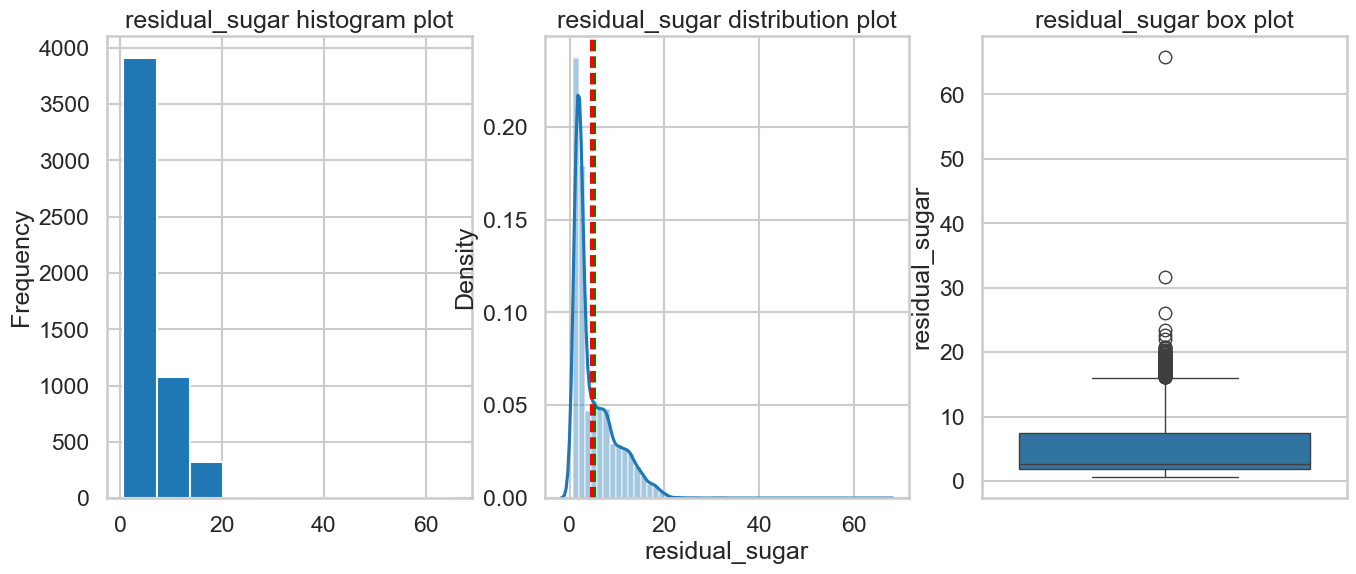

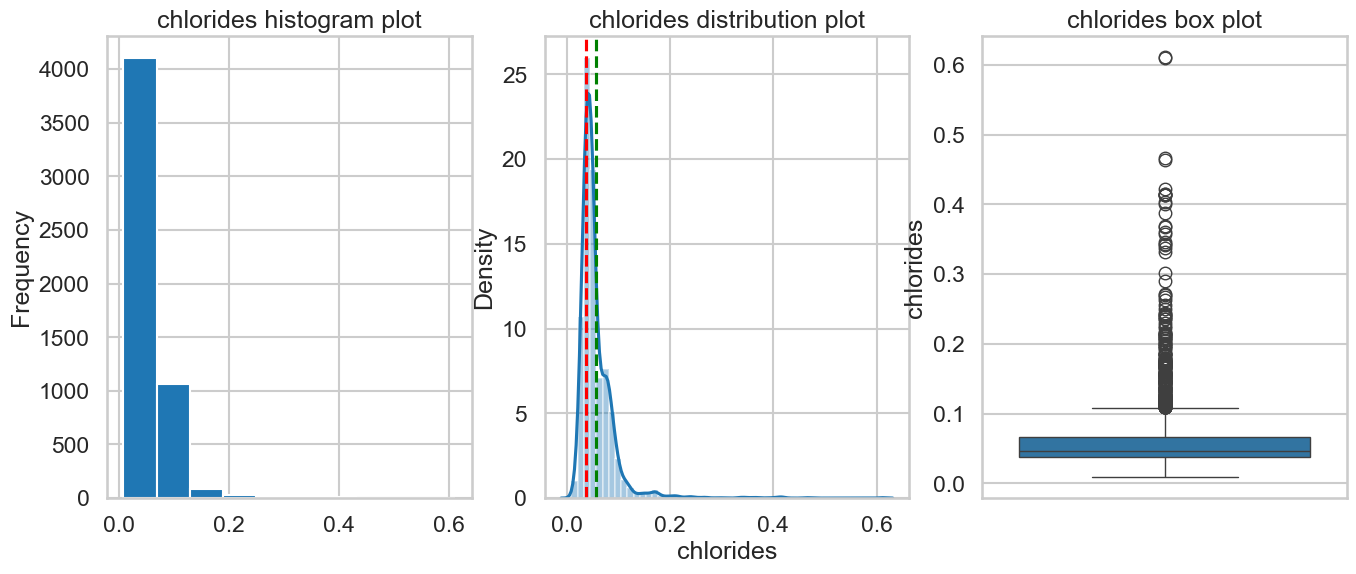

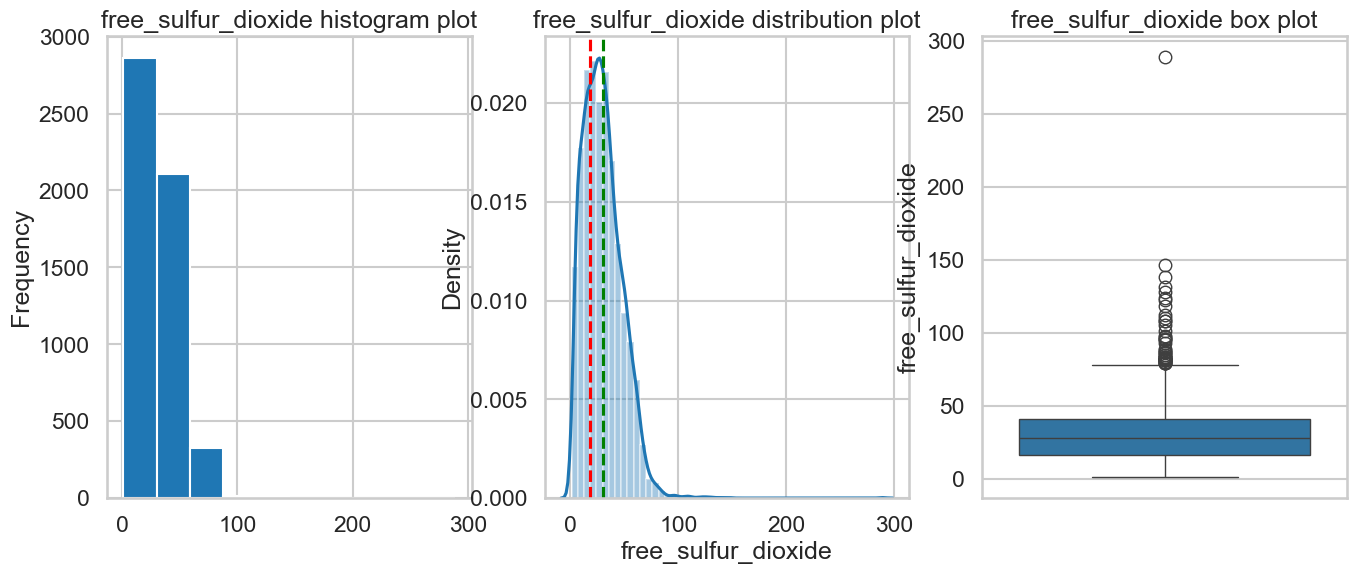

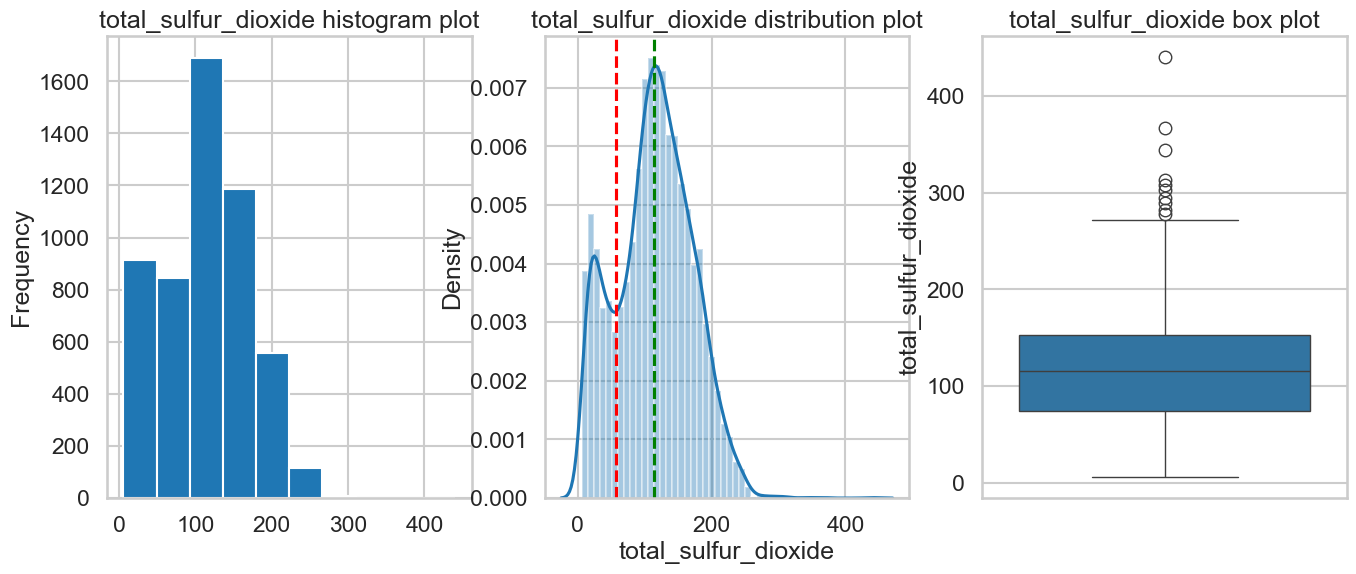

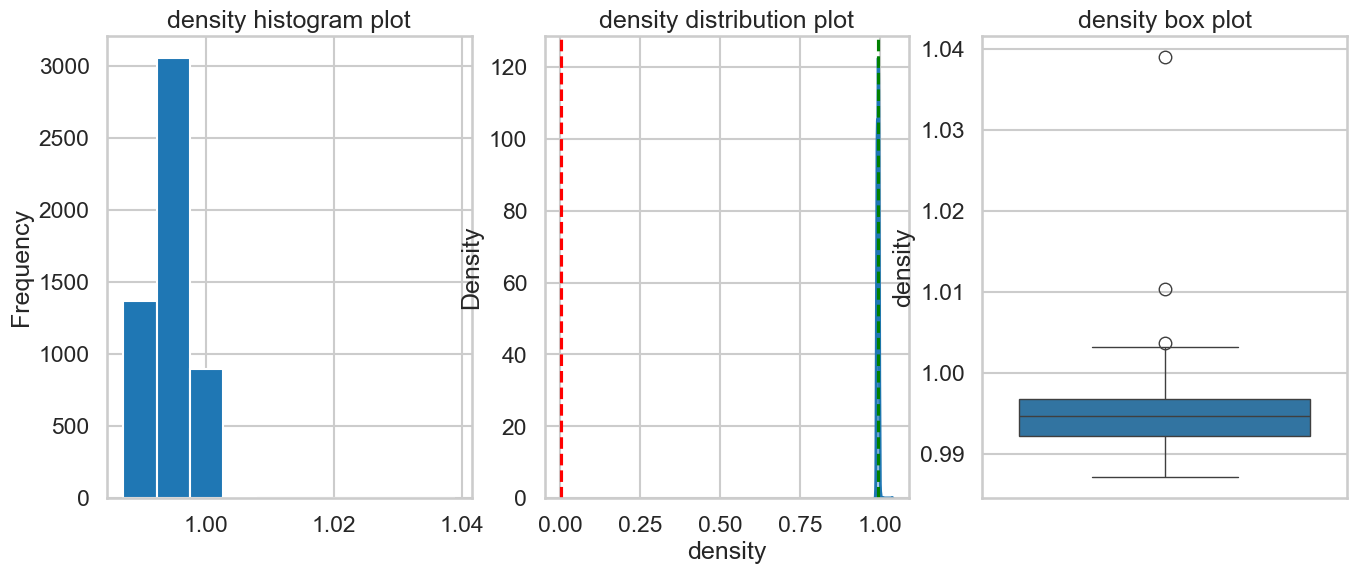

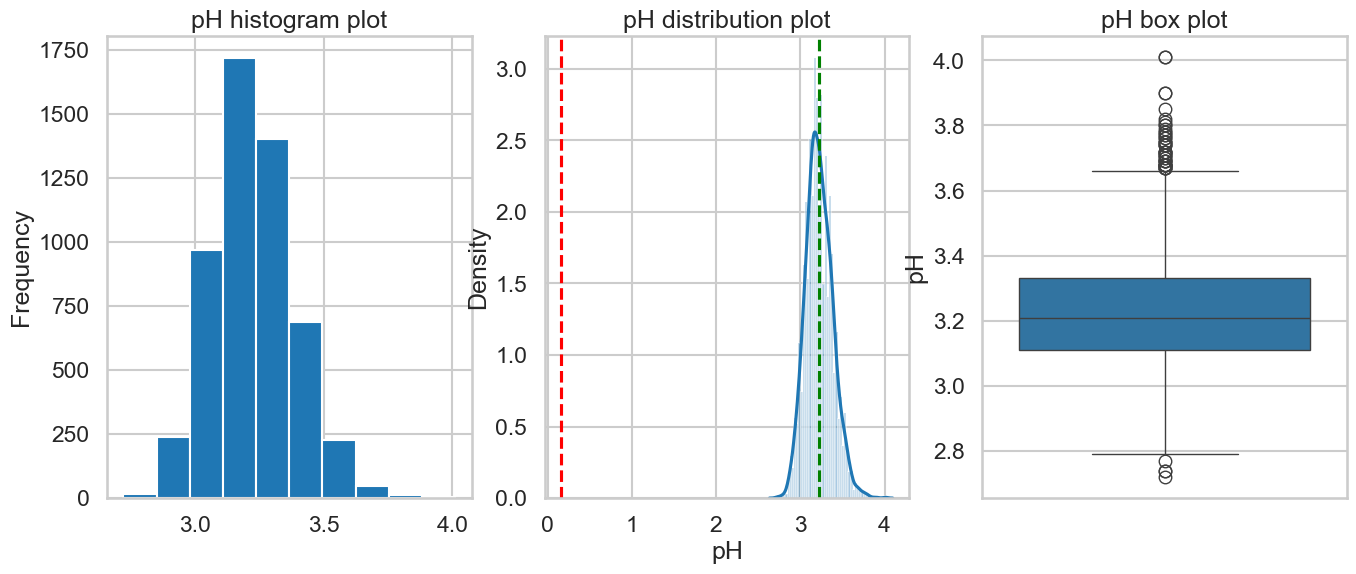

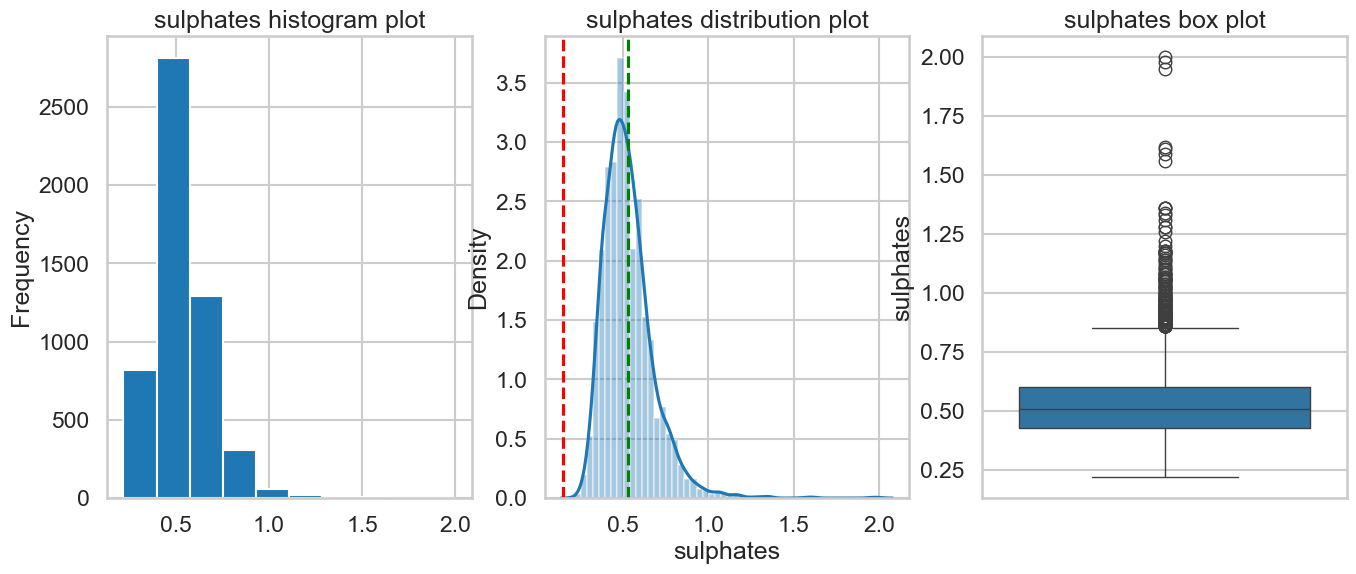

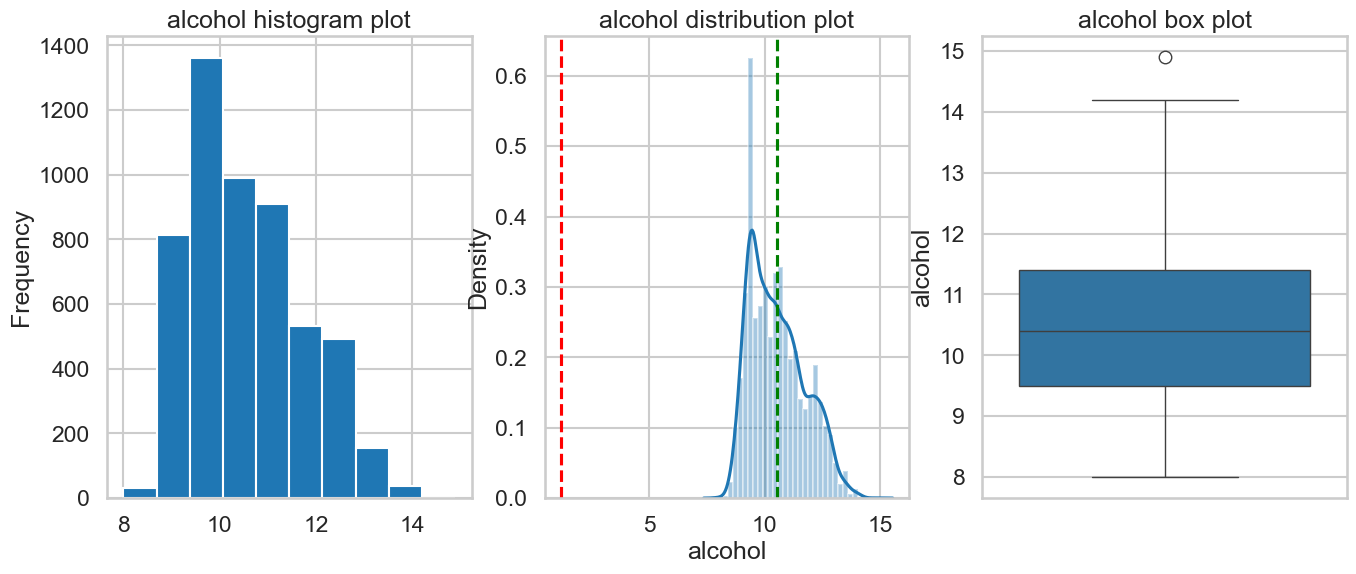

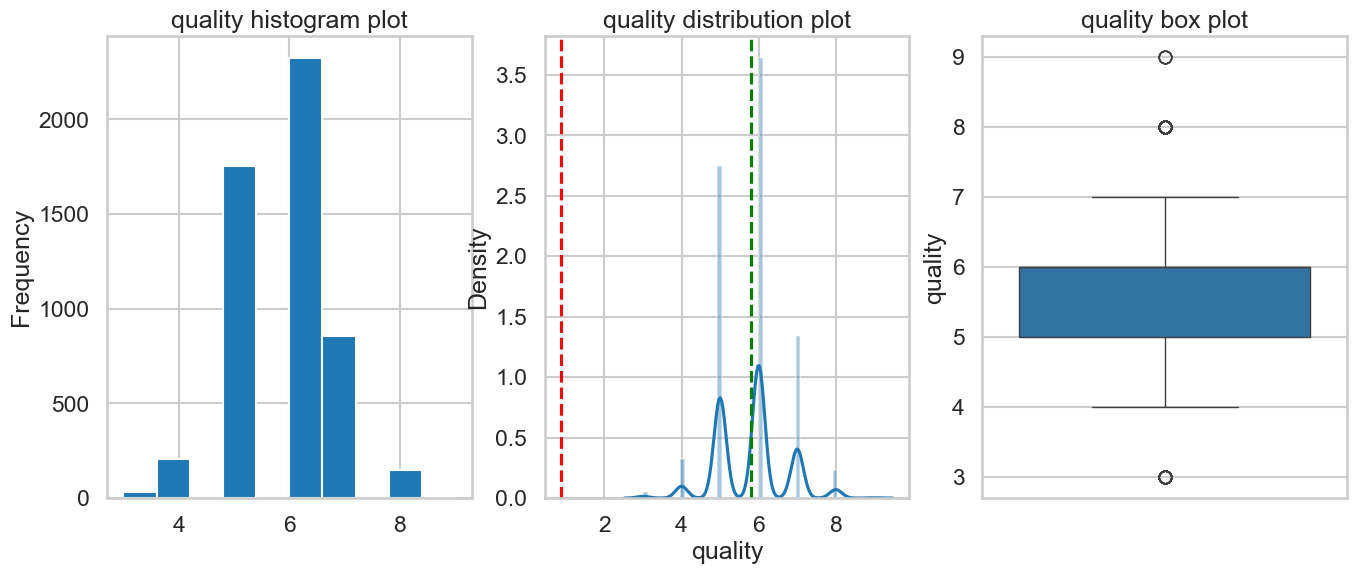

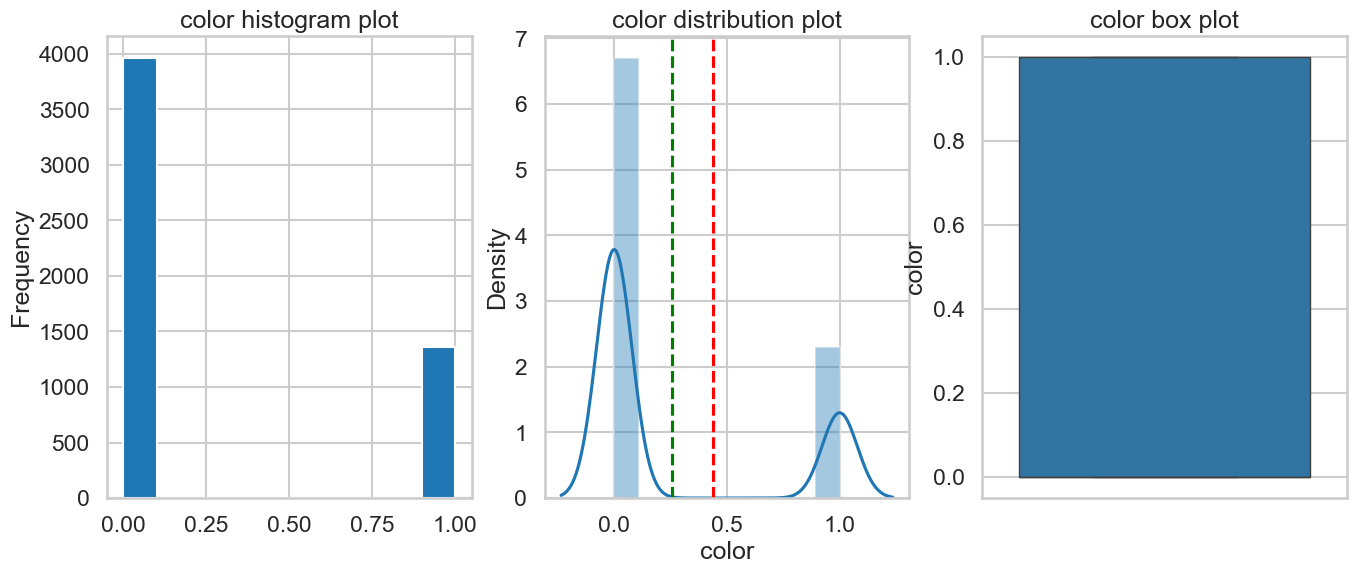

In [58]:
for i in num_feat.columns:
    feat_plot(num_feat[i])

### Bivariate Analysis

In [59]:
data.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'color'],
      dtype='object')

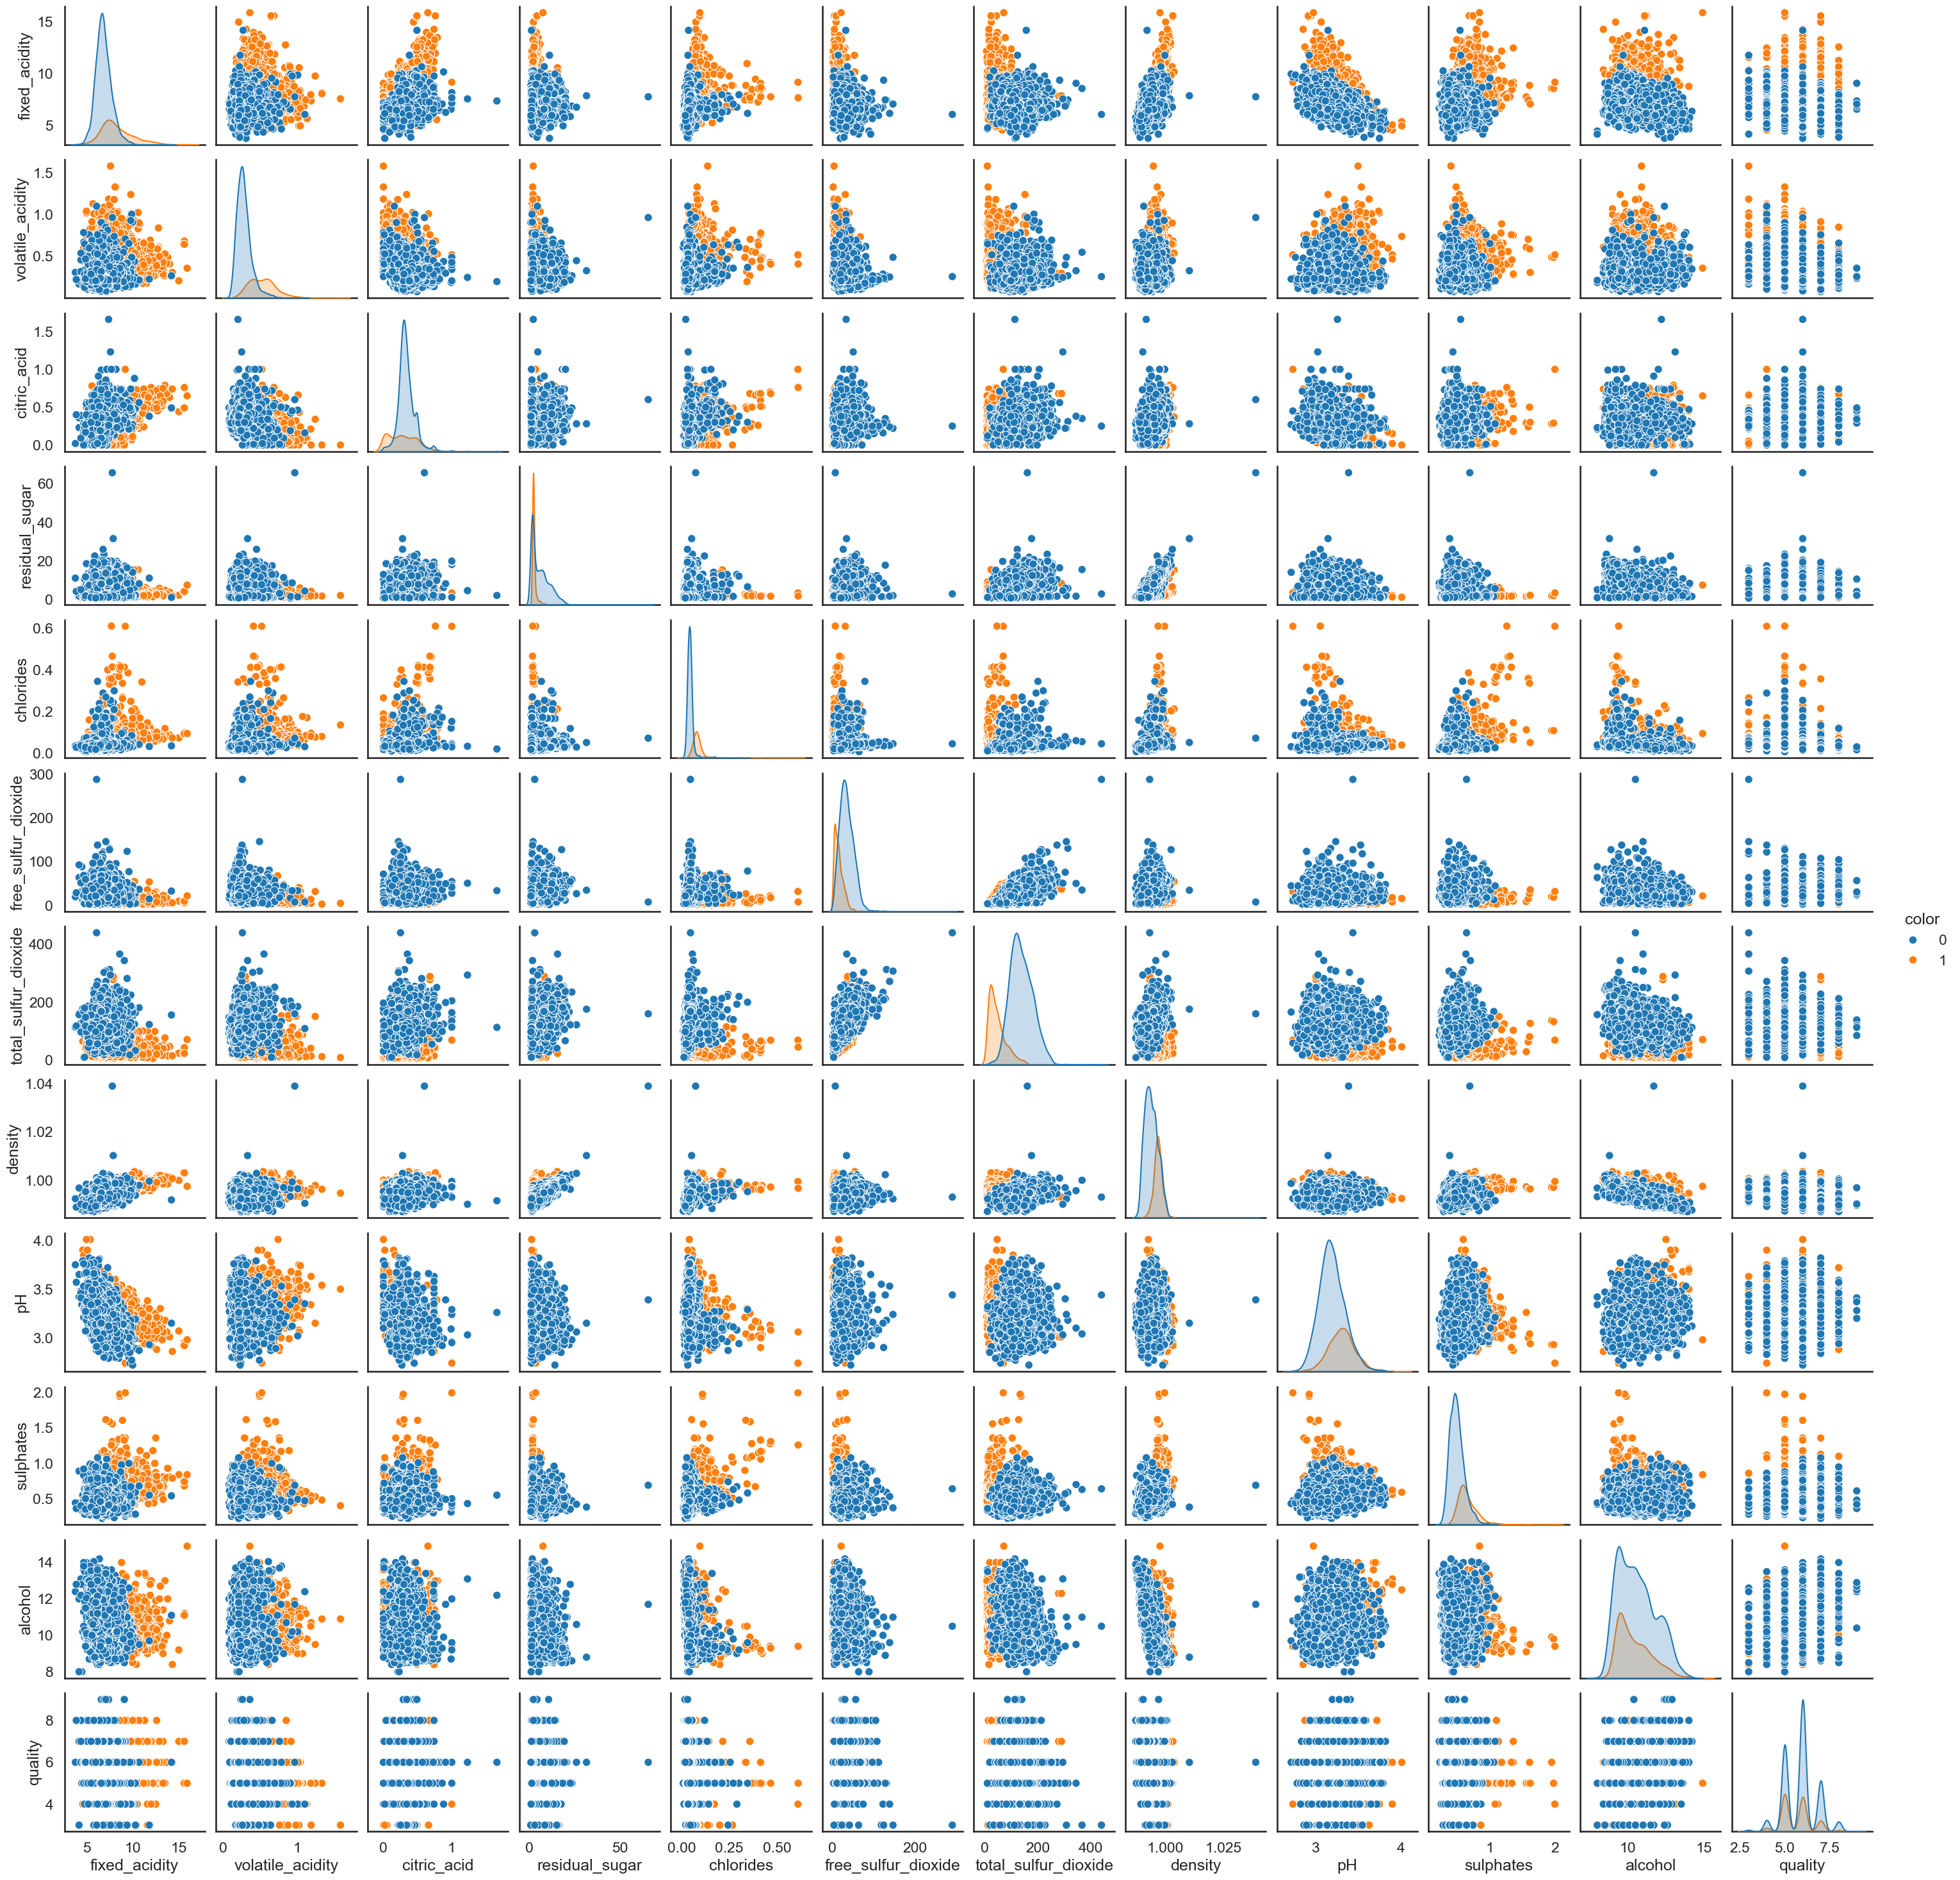

In [60]:
sns.set_context('talk')
#sns.set_palette(palette)
sns.set_style('white')
sns.pairplot(data, hue='color')

<Axes: >

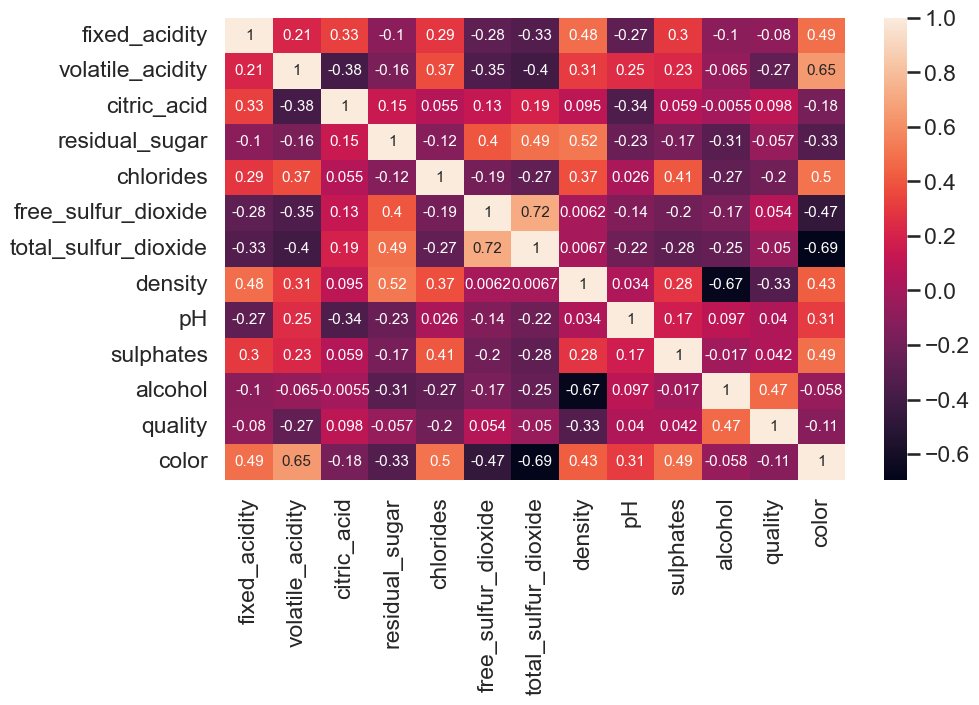

In [61]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), annot= True, annot_kws={"size":11})

## Model Building

In [62]:
data.drop('color', axis = 1, inplace = True)

In [63]:
y = data['quality']
X = data.drop('quality', axis = 1)

In [88]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [65]:
rs = 101
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= rs)

In [66]:
print(f'Shape of the X_train: {X_train.shape}')
print(f'Shape of the X_test: {X_test.shape}')
print(f'Shape of the y_train: {y_train.shape}')
print(f'Shape of the y_test: {y_test.shape}')

Shape of the X_train: (4256, 11)
Shape of the X_test: (1064, 11)
Shape of the y_train: (4256,)
Shape of the y_test: (1064,)


In [67]:
def model_evaluation(mod, X_train, y_train, X_test, y_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.fit_transform(X_test)
    
    model = mod.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    print("Classification report of the Model: \n {}".format(classification_report(y_test, y_pred)))
    print("Confusion Matrix of the given Model: \n {}".format(confusion_matrix(y_test, y_pred)))
    print("Accuracy score of the Model: \n{}".format(accuracy_score(y_test, y_pred)))
    
    return model   


### Random Forest Classifier

In [68]:
rfc = RandomForestClassifier()
rfc_model = model_evaluation(rfc, X_train, y_train, X_test, y_test)

Classification report of the Model: 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         9
           4       0.00      0.00      0.00        32
           5       0.60      0.60      0.60       356
           6       0.53      0.66      0.59       469
           7       0.50      0.34      0.40       172
           8       0.50      0.12      0.19        26

    accuracy                           0.55      1064
   macro avg       0.36      0.29      0.30      1064
weighted avg       0.53      0.55      0.53      1064

Confusion Matrix of the given Model: 
 [[  0   0   5   3   1   0]
 [  0   0  21  11   0   0]
 [  0   1 215 138   2   0]
 [  0   0 111 311  45   2]
 [  0   0   6 107  58   1]
 [  0   0   0  13  10   3]]
Accuracy score of the Model: 
0.5516917293233082


In [69]:
rfc_model.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'monotonic_cst', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [70]:
rfc_param_grid = {'n_estimators': [2*n+1 for n in range(20)],
             'max_depth' : [2*n+1 for n in range(10) ],
             'max_features':["auto", "sqrt", "log2"]}

In [71]:
rfc_gs = GridSearchCV(estimator=rfc_model, 
                      param_grid=rfc_param_grid,
                      scoring='accuracy', 
                      n_jobs=-1
)
rfc_gs.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                          23, 25, 27, 29, 31, 33, 35, 37, 39]},
             scoring='accuracy')

In [72]:
rfc_gs.best_score_

np.float64(0.5662603509817227)

In [73]:
rfc_gs.best_params_

{'max_depth': 7, 'max_features': 'log2', 'n_estimators': 37}

In [74]:
rfc_gs.best_estimator_

RandomForestClassifier(max_depth=7, max_features='log2', n_estimators=37)

### Decision Tree

In [75]:
dtc = DecisionTreeClassifier()
dtc_model = model_evaluation(dtc, X_train, y_train, X_test, y_test)

Classification report of the Model: 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         9
           4       0.12      0.12      0.12        32
           5       0.50      0.46      0.48       356
           6       0.51      0.52      0.52       469
           7       0.41      0.42      0.42       172
           8       0.10      0.12      0.11        26
           9       0.00      0.00      0.00         0

    accuracy                           0.46      1064
   macro avg       0.23      0.24      0.23      1064
weighted avg       0.46      0.46      0.46      1064

Confusion Matrix of the given Model: 
 [[  0   1   4   1   3   0   0]
 [  0   4  16  11   0   1   0]
 [  5  19 163 143  24   2   0]
 [  1   9 124 246  70  18   1]
 [  0   0  20  72  73   7   0]
 [  0   0   1  13   9   3   0]
 [  0   0   0   0   0   0   0]]
Accuracy score of the Model: 
0.45958646616541354


In [76]:
dtc_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 5],
    'max_features': range(1, len(dtc.feature_importances_)+1)
}

In [77]:
dtc_gs = GridSearchCV(dtc_model,
                  param_grid=dtc_param_grid,
                  scoring='accuracy',
                  n_jobs=-1)

dtc_gs.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15, 20],
                         'max_features': range(1, 12),
                         'min_samples_leaf': [1, 2, 5]},
             scoring='accuracy')

In [78]:
dtc_gs.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 10,
 'min_samples_leaf': 2}

In [79]:
dtc_gs.best_score_

np.float64(0.5418218279516503)

### SVC

In [89]:
svc = SVC()
svc_model = model_evaluation(svc, X_train, y_train, X_test, y_test)

Classification report of the Model: 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         9
           4       0.00      0.00      0.00        32
           5       0.60      0.61      0.61       356
           6       0.54      0.73      0.62       469
           7       0.53      0.20      0.29       172
           8       0.00      0.00      0.00        26

    accuracy                           0.56      1064
   macro avg       0.28      0.26      0.25      1064
weighted avg       0.52      0.56      0.52      1064

Confusion Matrix of the given Model: 
 [[  0   0   5   4   0   0]
 [  0   0  23   9   0   0]
 [  0   0 218 138   0   0]
 [  0   0 106 342  21   0]
 [  0   0   9 129  34   0]
 [  0   0   0  17   9   0]]
Accuracy score of the Model: 
0.5582706766917294


In [104]:
svc_param_grid = {
    'svc__C': [0.1, 1],
    'svc__kernel': ['linear', 'rbf', 'poly'],
}


In [105]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC())
])

In [106]:
svc_gs = GridSearchCV(
    estimator=pipeline,
    param_grid=svc_param_grid,
    scoring='accuracy',
    n_jobs=-1
)
svc_gs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svc', SVC())]),
             n_jobs=-1,
             param_grid={'svc__C': [0.1, 1],
                         'svc__kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy')

In [107]:
svc_gs.best_params_

{'svc__C': 1, 'svc__kernel': 'rbf'}

In [108]:
svc_gs.best_score_

np.float64(0.5613260841980989)